In [0]:
from google.colab import drive
import os

drive.mount('/content/drive',force_remount=True)
os.chdir("/content/drive/My Drive/Semestre 2019-02/Vision Artificial/Trabajo Rocas/imgRocas")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls

 1.jpg				      pretrained-yolov3.h5.12
 2.jpg				      pretrained-yolov3.h5.2
 3.jpg				      pretrained-yolov3.h5.3
 4.jpg				      pretrained-yolov3.h5.4
 5.jpg				      pretrained-yolov3.h5.5
 6.jpg				      pretrained-yolov3.h5.6
 7.jpg				      pretrained-yolov3.h5.7
 8.jpg				      pretrained-yolov3.h5.8
 8new.jpg			      pretrained-yolov3.h5.9
 EntrenamientoRedNeuronalYolo.ipynb   resnet50_coco_best_v2.0.1.h5
 img8				      RocksCNN
 pretrained-yolov3.h5		      SAM_1171.jpg
 pretrained-yolov3.h5.1		      SAM_1216.JPG
 pretrained-yolov3.h5.10	     'Segunda Entrga.ipynb'
 pretrained-yolov3.h5.11	      Untitled1.ipynb


# 1. Cortar imagen para facilitar el reconoccimiento

Se intentara cortar la imagen en 8 secciones a las qe se le aplicara el algoritmo de reconocimiento, ya que quizas esto haga mas facil la identificación de las rocas

In [0]:
##Cortar la imagen 
import PIL
from PIL import Image



imagen = PIL.Image.open("8.jpg")
ancho = int(imagen.size[0]/4)
alto = int(imagen.size[1]/4)
for si in range (4):
    for gh in range (4):
        caja = (gh*ancho, si*alto, (gh*ancho) + ancho, (si*alto) + alto)
        print (caja)
        print ('tamaño: ' + str(imagen.size))
        region = imagen.crop(caja)
        path = 'cuadrado'+str(si*gh+gh)+'.jpg'
        print (path)
        region.save('img8/'+path)

(0, 0, 256, 192)
tamaño: (1024, 768)
cuadrado0.jpg
(256, 0, 512, 192)
tamaño: (1024, 768)
cuadrado1.jpg
(512, 0, 768, 192)
tamaño: (1024, 768)
cuadrado2.jpg
(768, 0, 1024, 192)
tamaño: (1024, 768)
cuadrado3.jpg
(0, 192, 256, 384)
tamaño: (1024, 768)
cuadrado0.jpg
(256, 192, 512, 384)
tamaño: (1024, 768)
cuadrado2.jpg
(512, 192, 768, 384)
tamaño: (1024, 768)
cuadrado4.jpg
(768, 192, 1024, 384)
tamaño: (1024, 768)
cuadrado6.jpg
(0, 384, 256, 576)
tamaño: (1024, 768)
cuadrado0.jpg
(256, 384, 512, 576)
tamaño: (1024, 768)
cuadrado3.jpg
(512, 384, 768, 576)
tamaño: (1024, 768)
cuadrado6.jpg
(768, 384, 1024, 576)
tamaño: (1024, 768)
cuadrado9.jpg
(0, 576, 256, 768)
tamaño: (1024, 768)
cuadrado0.jpg
(256, 576, 512, 768)
tamaño: (1024, 768)
cuadrado4.jpg
(512, 576, 768, 768)
tamaño: (1024, 768)
cuadrado8.jpg
(768, 576, 1024, 768)
tamaño: (1024, 768)
cuadrado12.jpg


Se aplican algunos filtros y algoritmos de mascara (thershold) a  uno de los pedazos de la imagen buscando facilitar el trabajo de identificación a los algortimos de cv2

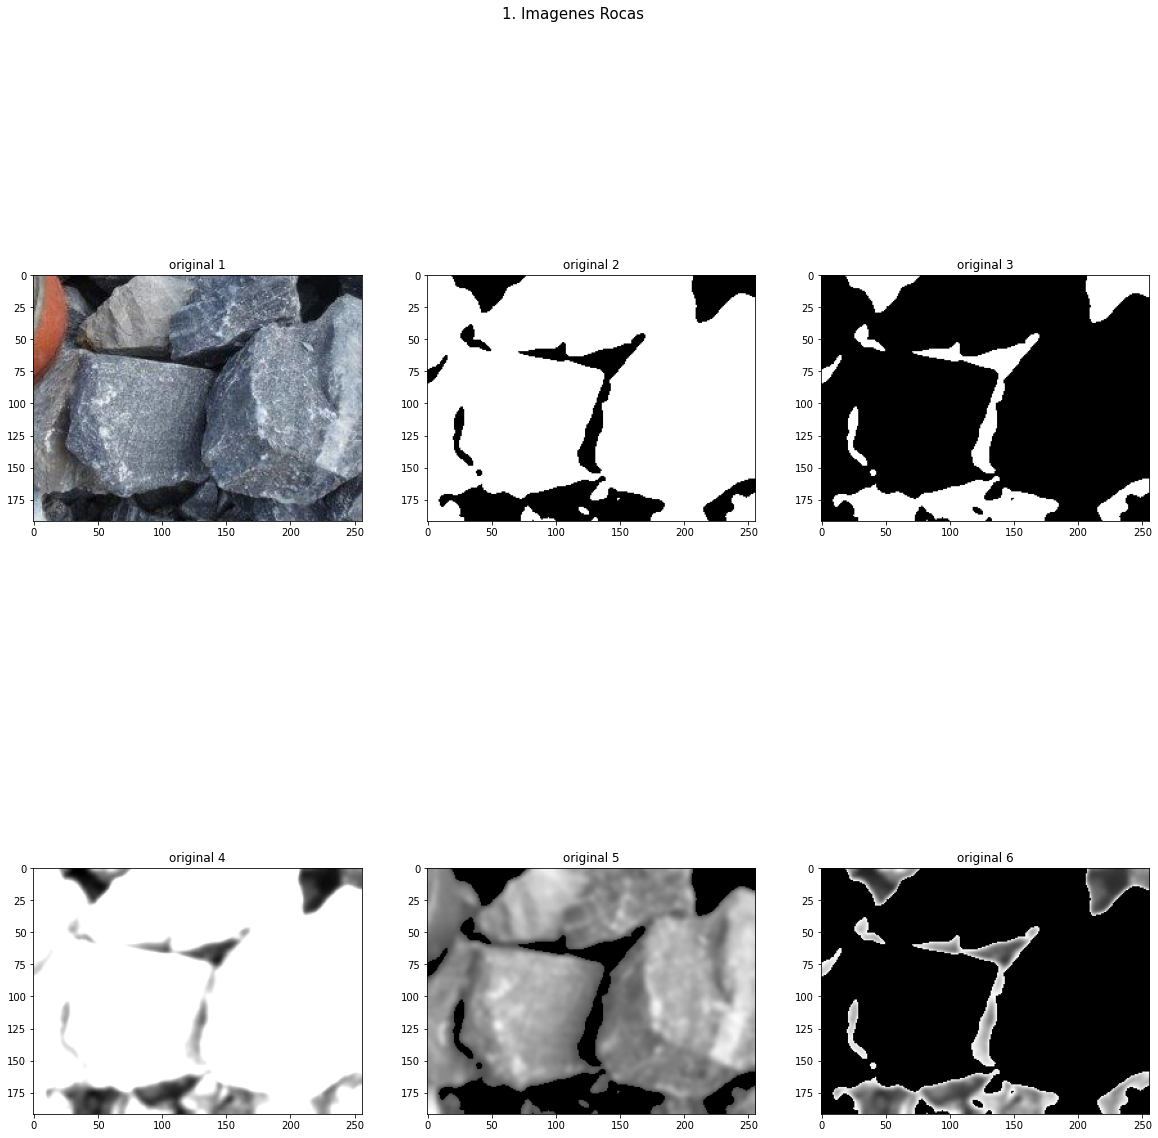

In [0]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
###Espacio para importar las librerías###

#Magic para mostrar imágenes en Jupyter usando matplotlib
%matplotlib inline 

imgori = cv2.cvtColor(cv2.imread("img8/cuadrado6.jpg"),cv2.COLOR_BGR2RGB)

##h, s, v = cv2.split(hsv) 
##v += 30 
##s +=50
##h +=0
##final_hsv = cv2.merge((h, s, v)) 

##img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR) 

# Convertimos a escala de grises
img = cv2.cvtColor(imgori, cv2.COLOR_BGR2GRAY)
# Aplicar suavizado Gaussiano
img = cv2.GaussianBlur(img, (11,11), 0)
ret,thresh1 = cv2.threshold(img,70,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,70,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,70,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,70,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,70,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [imgori, thresh1, thresh2, thresh3, thresh4, thresh5]

fig, ((ax1, ax2, ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20, 20))
fig.suptitle('1. Imagenes Rocas', fontsize=15)
ax1.set_title('original 1')
ax1.imshow(images[0],'gray')
ax2.set_title('original 2')
ax2.imshow(images[1],'gray')
ax3.set_title('original 3')
ax3.imshow(images[2],'gray')
ax4.set_title('original 4')
ax4.imshow(images[3],'gray')
ax5.set_title('original 5')
ax5.imshow(images[4],'gray')
ax6.set_title('original 6')
ax6.imshow(images[5],'gray')

Se tomara un pezado de imagen y se aplicara un filtro de frises, suavizado gaussiano y por ultimo una mascara (se prueba binaria y truncada). Posterirmente se aplicara la funciones de detección e identificación de contornos  de cv2 (canny y findContours) buscando identificar las rocas de este pedazo de imagen

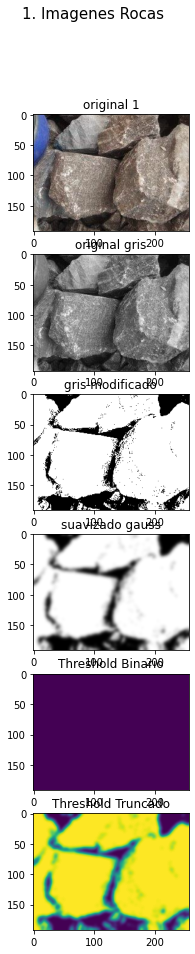

In [0]:

# Cargamos la imagen
original = cv2.imread("img8/cuadrado6.jpg")


# Convertimos a escala de grises
gris = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

gris1 =gris.copy()
gris1[(gris <= 65)] = 0
gris1[(gris >= 70)] = 255

# Aplicar suavizado Gaussiano
gauss = cv2.GaussianBlur(gris1, (15,15), 0)

ret,thresh1 = cv2.threshold(gauss,0,0,cv2.THRESH_BINARY)
ret,thresh3 = cv2.threshold(gauss,255,255,cv2.THRESH_TRUNC)


# Detectamos los bordes con Canny
canny = cv2.Canny(thresh3, 50, 150)
 

# Buscamos los contornos
(contornos,_) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

fig, ((ax1, ax2,ax3,ax4, ax5,ax6)) = plt.subplots(6,1, figsize=(20, 15))
fig.suptitle('1. Imagenes Rocas', fontsize=15)
ax1.set_title('original 1')
ax1.imshow(original,cmap='gray')
ax2.set_title('original gris')
ax2.imshow(gris,cmap='gray')
ax3.set_title('gris modificado')
ax3.imshow(gris1, cmap='gray')
ax4.set_title('suavizado gauss')
ax4.imshow(gauss,cmap='gray')
ax5.set_title('Threshold Binario')
ax5.imshow(thresh1)
ax6.set_title('Threshold Truncado')
ax6.imshow(thresh3)

He encontrado 203 objetos


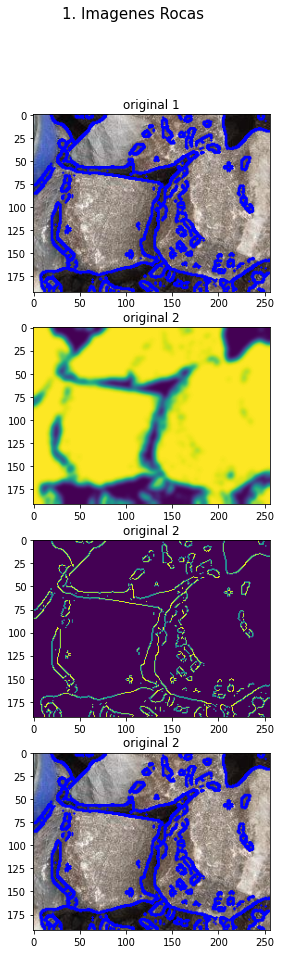

In [0]:
# Detectamos los bordes con Canny
canny = cv2.Canny(thresh3, 5, 10)
 

# Buscamos los contornos
(contornos,_) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 
# Mostramos el número de monedas por consola
print("He encontrado {} objetos".format(len(contornos)))
 
contornos=cv2.drawContours(original,contornos,-1,(0,0,255), 2)


fig, ((ax1, ax2,ax3,ax4)) = plt.subplots(4,1, figsize=(20, 15))
fig.suptitle('1. Imagenes Rocas', fontsize=15)
ax1.set_title('original 1')
ax1.imshow(original)
ax2.set_title('original 2')
ax2.imshow(gauss)
ax3.set_title('original 2')
ax3.imshow(canny)
ax4.set_title('original 2')
ax4.imshow(contornos)

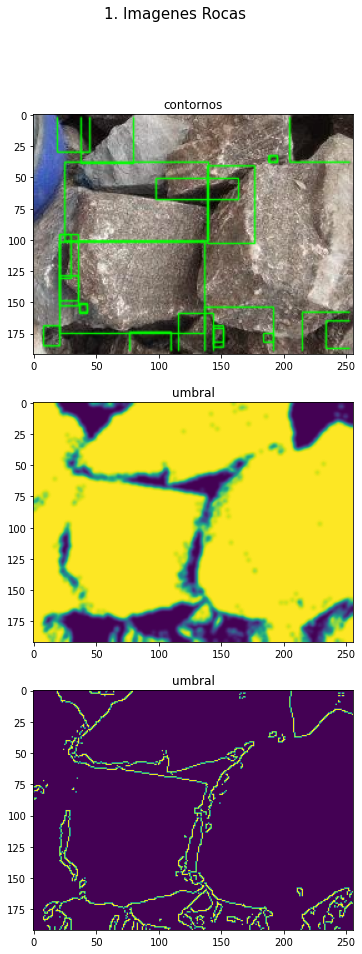

In [0]:
import numpy as np
import cv2

original = cv2.imread("img8/cuadrado6.jpg")

##gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
##gray = cv2.GaussianBlur(gray, (11, 11), 1)

##t, dst = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_TRIANGLE)

# Detectamos los bordes con Canny
##canny = cv2.Canny(dst, 0,30 )


# Convertimos a escala de grises
gris = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

gris1 =gris.copy()
gris1[(gris <= 60)] = 0
gris1[(gris >= 61)] = 255

# Aplicar suavizado Gaussiano
gauss = cv2.GaussianBlur(gris1, (7,7), 0)

ret,thresh1 = cv2.threshold(gauss,0,0,cv2.THRESH_BINARY)
ret,thresh3 = cv2.threshold(gauss,255,255,cv2.THRESH_TRUNC)


# Detectamos los bordes con Canny
canny = cv2.Canny(thresh3, 150, 150)
 
contours, _ = cv2.findContours(canny.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


for c in contours:
    area = cv2.contourArea(c)
    if area > 10 and area < 1000:
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(original, (x, y), (x + w, y + h), (0, 255, 0), 1, cv2.LINE_AA)


fig, (ax1, ax2,ax3) = plt.subplots(3,1, figsize=(20, 15))
fig.suptitle('1. Imagenes Rocas', fontsize=15)
ax1.set_title('contornos')
ax1.imshow(original)
ax2.set_title('umbral')
ax2.imshow(thresh3)
ax3.set_title('umbral')
ax3.imshow(canny)

## 2. Implementación super pixeles

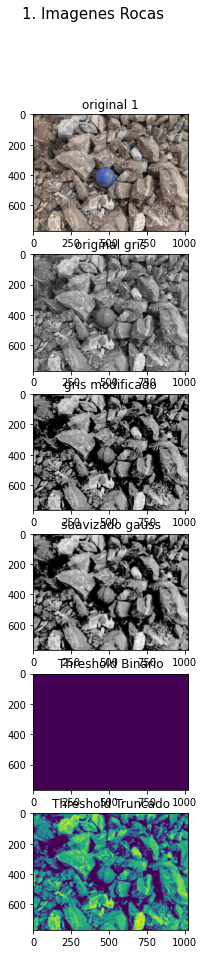

In [0]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

# Cargamos la imagen
original = cv2.imread("8.jpg")


# Convertimos a escala de grises
gris = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

gris1 =gris.copy()
gris1[(gris <= 100)] = 0
#gris1[(gris >= 101)] = 255

# Aplicar suavizado Gaussiano
gauss = cv2.GaussianBlur(gris1, (7,7), 2)

ret,thresh1 = cv2.threshold(gauss,0,0,cv2.THRESH_BINARY)
ret,thresh3 = cv2.threshold(gauss,255,255,cv2.THRESH_TRUNC)


# Detectamos los bordes con Canny
canny = cv2.Canny(thresh3, 70, 150)
 

# Buscamos los contornos
(contornos,_) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

fig, ((ax1, ax2,ax3,ax4, ax5,ax6)) = plt.subplots(6,1, figsize=(20, 15))
fig.suptitle('1. Imagenes Rocas', fontsize=15)
ax1.set_title('original 1')
ax1.imshow(original,cmap='gray')
ax2.set_title('original gris')
ax2.imshow(gris,cmap='gray')
ax3.set_title('gris modificado')
ax3.imshow(gris1, cmap='gray')
ax4.set_title('suavizado gauss')
ax4.imshow(gauss,cmap='gray')
ax5.set_title('Threshold Binario')
ax5.imshow(thresh1)
ax6.set_title('Threshold Truncado')
ax6.imshow(thresh3)

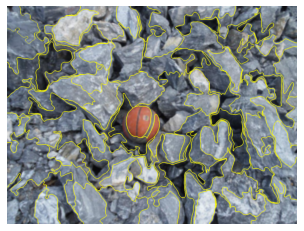

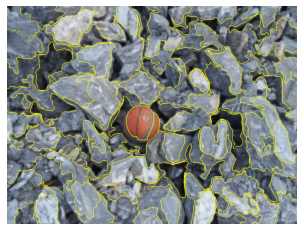

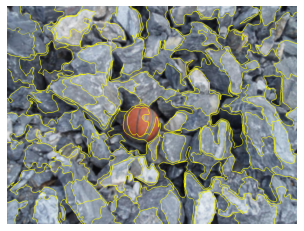

In [0]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
# construct the argument parser and parse the arguments

# load the image and convert it to a floating point data type
image = img_as_float(io.imread("8.jpg"))

image = cv2.GaussianBlur(image, (9,9), 0)

# loop over the number of segments
for numSegments in (90, 100, 130):
	# apply SLIC and extract (approximately) the supplied number
	# of segments
	segments = slic(image, n_segments = numSegments, sigma = 5)
	# show the output of SLIC
	fig = plt.figure("Superpixels -- %d segments" % (numSegments))
	ax = fig.add_subplot(1, 1, 1)
	ax.imshow(mark_boundaries(image, segments))
	plt.axis("off")
# show the plots
plt.show()

# 3. Uso de una red neuronal para identificar las rocas

Para esta parte, se termino de entreno una red neuronal YOLO (preentrenada) con imagenes de rocas solas y coglomerados de rocas. El entrenamiento se peude enocntrar en los anexos junto con las imagenes utilizadas para entrenarla y probarla

In [0]:
!pip3 install tensorflow-gpu==1.13.1

!pip3 install imageai --upgrade

Requirement already up-to-date: imageai in /usr/local/lib/python3.6/dist-packages (2.1.5)


In [0]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="RocksCNN")
trainer.evaluateModel(model_path="RocksCNN/models", json_path="RocksCNN/json/detection_config.json", iou_threshold=0.5, object_threshold=0.3, nms_threshold=0.5)



Starting Model evaluation....
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model File:  RocksCNN/models/detection_model-ex-001--loss-0120.251.h5 

Using IoU :  0.5
Using Object Threshold :  0.3
Using Non-Maximum Suppression :  0.5
rock: 0.0000
mAP: 0.0000
Model File:  RocksCNN/models/detection_model-ex-001--loss-0264.994.h5 

Using IoU :  0.5
Using Object Threshold :  0.3
Using Non-Maximum Suppression :  0.5
rock: 0.0000
mAP: 0.0000
Model File:  RocksCNN/models/detection_model-ex-001--loss-0277.969.h5 

Using IoU :  0.5
Using Object Threshold :  0.3
Using Non-Maximum Suppression :  0.5
rock: 0.0000
mAP: 0.0000
Model File:  RocksCNN/models/detection_model-ex-001--loss-0319.974.h5 

Using IoU :  0.5
Using Object Threshold :  0.3
Using Non-Maximum Suppression :  0.5
rock: 0.0000
mAP: 0.0000
Model File:  RocksCNN/models/detection_model-ex-002--loss-0063.357.h5 

Using IoU :  0.5
Using Object Threshold :  0.3
Using Non-Maximum Suppression :  0.5
rock: 0.0000
mAP: 0.0000
Model File:  RocksCNN/models/detection_model-ex-002--loss-0207.962.h5 

Using IoU :  0.5
Using 

# SEGMENTACIÓN DE IMÁGENES CON EL ALGORITMO WATERSHED

Mounted at /content/drive


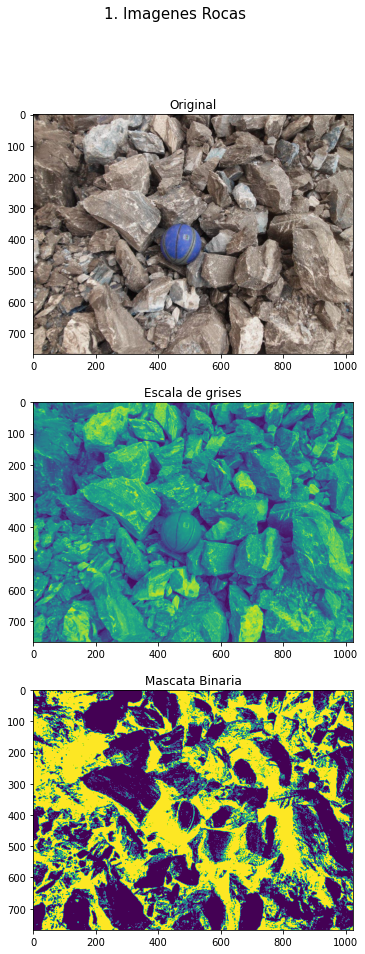

In [2]:
from google.colab import drive
import os

drive.mount('/content/drive',force_remount=True)
os.chdir("/content/drive/My Drive/Semestre 2019-02/Vision Artificial/segunda entrga vision")

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('8.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


fig, (ax1, ax2,ax3) = plt.subplots(3,1, figsize=(20, 15))
fig.suptitle('1. Imagenes Rocas', fontsize=15)
ax1.set_title('Original')
ax1.imshow(img)
ax2.set_title('Escala de grises')
ax2.imshow(gray)
ax3.set_title('Mascata Binaria')
ax3.imshow(thresh)

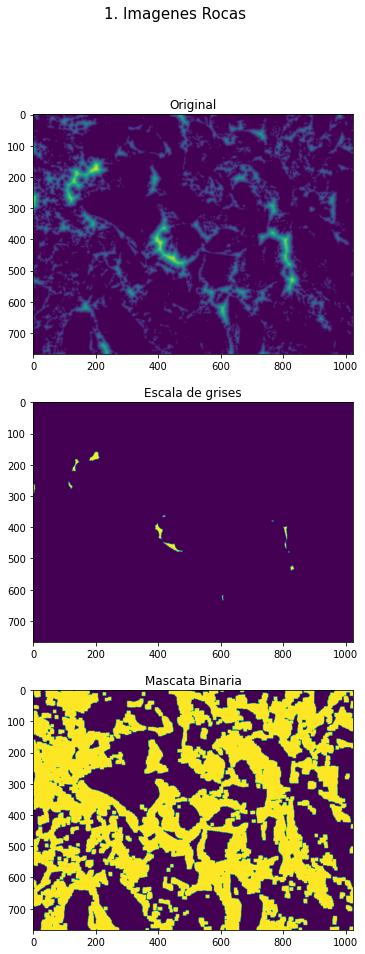

In [3]:
# Eliminación del ruido
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# Encuentra el área del fondo
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Encuentra el área del primer
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Encuentra la región desconocida (bordes)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)


fig, (ax1, ax2,ax3) = plt.subplots(3,1, figsize=(20, 15))
fig.suptitle('1. Imagenes Rocas', fontsize=15)
ax1.set_title('Original')
ax1.imshow(dist_transform)
ax2.set_title('Escala de grises')
ax2.imshow(sure_fg)
ax3.set_title('Mascata Binaria')
ax3.imshow(unknown)

In [0]:
# Etiquetado
ret, markers = cv2.connectedComponents(sure_fg)

# Adiciona 1 a todas las etiquetas para asegurra que el fondo sea 1 en lugar de cero
markers = markers+1

# Ahora se marca la región desconocida con ceros
markers[unknown==255] = 0

In [0]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]